아래에 있는 셀의 내용들을 가지고 web3.py라는 파이썬 파일을 만들자
- (txt파일 만들기)를 이용해서 복사, 붙여넣기

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)


@app.route("/")
def home(): # 미리 static폴더를 web2.py파일이 있는 폴더에 하나 더 만들어놓고 Lena.png파일을 넣어놓고 해야함
    html = """
    <h1>hello</h1>
    <img src=/static/Lena.png> <br>   
    <iframe
    allow="microphone;"
    width="400"
    height="550"
    src="https://console.dialogflow.com/api-client/demo/embedded/namho">
</iframe>
    """
    return html

cnt=0
@app.route('/counter')
def counter():  # 두가지 방법이 있음
    global cnt
    cnt += 1
    """
    html = ""
    for i in str(cnt) :
        html +=f"<img src=/static/{i}.png width=32>"
    html += "명이 방문했습니다."
    """
    html = "".join([ f"<img src=/static/{i}.png width=32>" for i in str(cnt) ])
    html += "명이 방문했습니다."
    return html


@app.route('/weather', methods=["POST", "GET"])
def weather():
    if request.method == "GET" :
        req = request.args
    else : 
        req = request.form
    
    city = req.get("city")
    return f"{city} 날씨 좋아요"

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5020, debug=True) # 0.0.0.0은 누구나 다 들어올 수 있게 하려고


---

- 아래와 같이 static폴더에 form.html 파일을 만든다.
- 여기서 method= get은 디폴트이기 때문에 안써도 됌
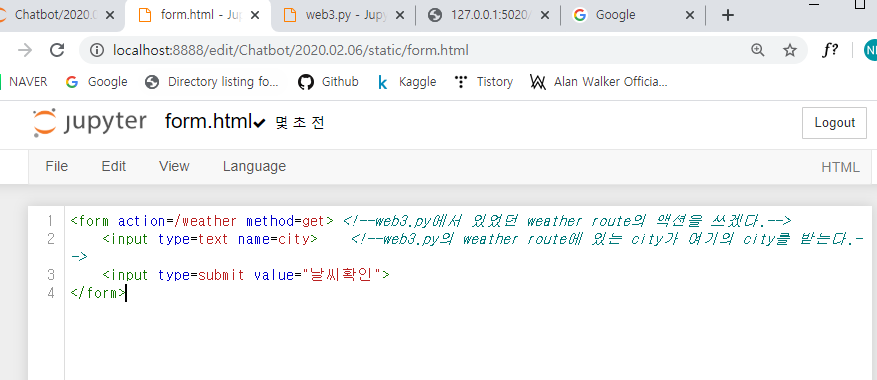

웹브라우저의 URL창에서 127.0.0.1:5020/static/form.html을 실행시키면 아래와 같은 창이 나온다.
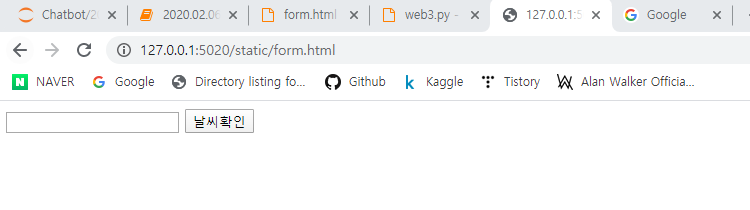



부산을 입력하고 "날씨확인"버튼을 누르면 아래와 같이 나오는데 빨간 원처럼 나오는 이유는 **GET**방식을 써서 그렇다.
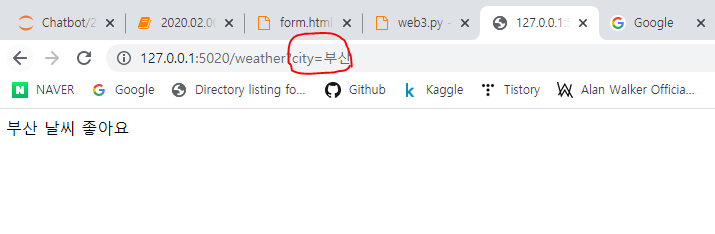

이번엔 POST방식을 이용해보자. 다음과 같이 form.html 파일에서 method를 post로 바꾸고 저장해보자
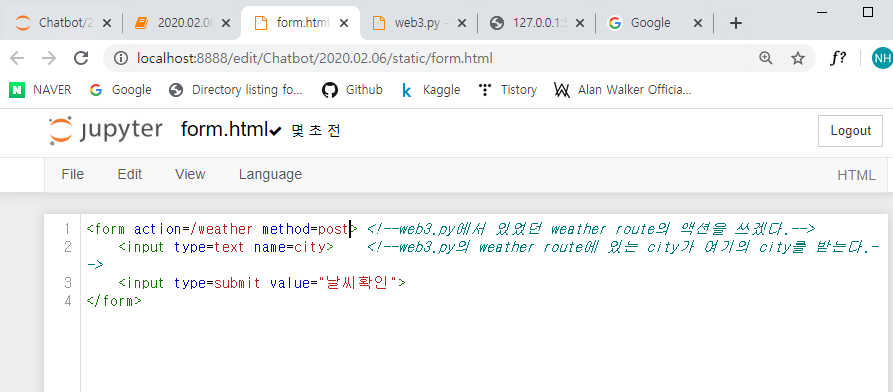

web3.py에서는 아래와 같이 처음부터 methods를 post, get방식 모두 저장했기 때문에 건드릴 필요가 없다.
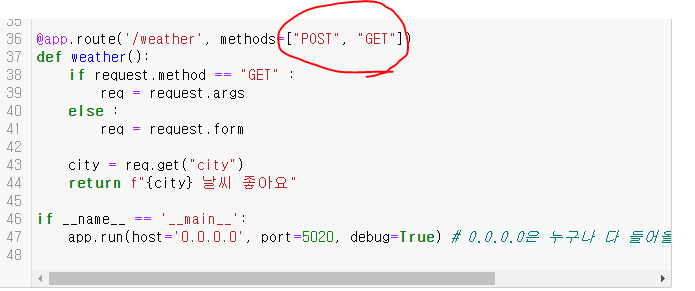

웹브라우저 URL에서 다시 127.0.0.1:5020/static/form.html을 실행시킨 후 다시 '부산'을 입력하고 날씨확인 버튼을 누르면 다음과 같은 화면이 나온다.
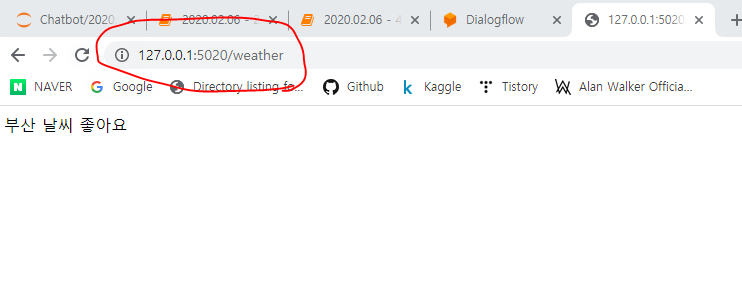

이를 통해서 GET방식은 URL쪽에서 노출이 되고 POST방식은 전혀 노출이 되지 않음을 알 수 있다.

단위 테스트
- 우선 GET방식으로 보고 POST방식으로 dialogflow 돌려봄